In [1]:
#이 부분은 처음 한번만 실행하면 됨. 
!pip install selenium
!apt-get update
!apt install chromium-chromedriver  # 마우스, 키보드 입력 효과 줄 수 있다.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import matplotlib as mpl
import matplotlib.pyplot as plt

#한글깨짐 방지 -> 하지만 이 코드에선 사용 안함. path로 함.
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'

%config InlineBackend.figure_format = 'retina'

# 라이브러리 임포트
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

import pandas as pd

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'cp'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import os
# selenium으로부터 webdriver 모듈을 불러옵니다.
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
# Explicit Wait을 위해 추가
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
# 인기 급상승 url
url = 'https://www.youtube.com/feed/trending{}'
# 최신, 음악, 게임, 영화
categories = {
    'recent': '',
    'music': '?bp=4gINGgt5dG1hX2NoYXJ0cw%3D%3D',
    'game': '?bp=4gIcGhpnYW1pbmdfY29ycHVzX21vc3RfcG9wdWxhcg%3D%3D',
    'movie': '?bp=4gIKGgh0cmFpbGVycw%3D%3D'
}
# 링크 저장할 경로
link_path = '{}_link.txt'
# 기다리는 시간
wait_time = 10

for cat, path in categories.items():
    current_path = link_path.format(cat)
    current_url = url.format(path)
    with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:
        #크롬 드라이버에 url 주소 넣고 실행
        driver.get(current_url)
        element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, 'thumbnail')))

        # 링크 가져오기
        thumbnails = driver.find_elements(By.ID, 'thumbnail')
        links = [t.get_attribute('href') for t in thumbnails if t.get_attribute('href') is not None]

        # shorts 제외 video 링크만 가져오기
        # 게임의 경우 shorts가 리스트에 포함되어 있음
        # videos = driver.find_elements(By.TAG_NAME, 'ytd-video-renderer')
        # thumbnails = [v.find_element(By.ID, 'thumbnail') for v in videos]
        # links = [t.get_attribute('href') for t in thumbnails if t.get_attribute('href') is not None]

        # text 파일로 링크 저장
        mode = 'w' if os.path.exists(current_path) else 'a'
        with open(current_path, mode) as f:
            f.write('\n'.join(links))

In [4]:
urls =[]
with open("movie_link.txt", "r") as f:
    while True:
        line = f.readline()
        urls.append(line)
        if not line: # 파일 읽기가 종료된 경우
            break
        print(line.strip())
print(urls)

https://www.youtube.com/watch?v=ysW2FxaFOkI
https://www.youtube.com/watch?v=3xQws6Kq5-8
https://www.youtube.com/watch?v=OGx85MetThQ
https://www.youtube.com/watch?v=qHGUxDHFxYU
https://www.youtube.com/watch?v=Ef1TBzqgLk4
https://www.youtube.com/watch?v=iuk77TjvfmE
https://www.youtube.com/watch?v=b_bBb1PO_N0
https://www.youtube.com/watch?v=108oUvOd3mY
https://www.youtube.com/watch?v=RzZGxYm19WA
https://www.youtube.com/watch?v=zmNRHgRG3lo
https://www.youtube.com/watch?v=CCGGQHcHWCY
https://www.youtube.com/watch?v=FEU2DoCMUMM
https://www.youtube.com/watch?v=jyasXXWd0VA
https://www.youtube.com/watch?v=lBO5bJVH9eg
https://www.youtube.com/watch?v=aLsV10F4R_E
https://www.youtube.com/watch?v=UoXfG4uxl6o
https://www.youtube.com/watch?v=19ikl8vy4zs
https://www.youtube.com/watch?v=ZsrahE6znRA
https://www.youtube.com/watch?v=RDE6Uz73A7g
https://www.youtube.com/watch?v=1VhA9aITCGg
https://www.youtube.com/watch?v=HnzNZ0Mdx4I
https://www.youtube.com/watch?v=GRyt3Ov4zz0
https://www.youtube.com/watch?v=

In [5]:
urls = urls[:10]

In [6]:
urls

['https://www.youtube.com/watch?v=ysW2FxaFOkI\n',
 'https://www.youtube.com/watch?v=3xQws6Kq5-8\n',
 'https://www.youtube.com/watch?v=OGx85MetThQ\n',
 'https://www.youtube.com/watch?v=qHGUxDHFxYU\n',
 'https://www.youtube.com/watch?v=Ef1TBzqgLk4\n',
 'https://www.youtube.com/watch?v=iuk77TjvfmE\n',
 'https://www.youtube.com/watch?v=b_bBb1PO_N0\n',
 'https://www.youtube.com/watch?v=108oUvOd3mY\n',
 'https://www.youtube.com/watch?v=RzZGxYm19WA\n',
 'https://www.youtube.com/watch?v=zmNRHgRG3lo\n']

In [7]:
from prompt_toolkit.formatted_text.html import html_escape

user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
url = "https://www.youtube.com/feed/trending"

options = webdriver.ChromeOptions()
# 크롬창 띄우기 X
# options.add_argument('headless')
options.add_argument('window-size=1920*1080')
# 크롤링 성능 향상
options.add_argument('disable-gpu')
options.add_argument('lang=ko_KR, en_US')
options.add_argument('user-agent=' + user_agent)

driver = webdriver.Chrome('chromedriver', options=options)

#driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)

#url = "https://www.youtube.com/feed/trending"

# 파싱해서 넣을 실제 데이터 리스트
id_final = []
comment_final = []

for url in urls:  
    
    driver.get(url) # 링크 열기
    driver.implicitly_wait(3)
    
    time.sleep(1.5)

    driver.execute_script('window.scrollTo(0, 800)') # 한번 스크롤
    time.sleep(3)

    last_height = driver.execute_script('return document.documentElement.scrollHeight') # 스크롤 전체 높이

    while True:
      driver.execute_script('window.scrollTo(0, document.documentElement.scrollHeight);') # 스크롤 다운
      time.sleep(1.5)

      new_height = driver.execute_script('return document.documentElement.scrollHeight') # 스크롤 다운 후 스크롤 높이 

      if new_height == last_height: # 댓글 마지막 페이지면 while문 벗어남
        break

      last_height = new_height
      time.sleep(1.5)

      try:
        driver.find_element_by_css_selector('#dismiss-button > a').click() # 유튜브 1달 무료 팝업닫기

      except:
        pass
    
    
    # 댓글 크롤링 
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select('div#header-author > h3 > #author-text > span') # id 리스트
    comment_list = soup.select('yt-formatted-string#content-text') # comment 리스트  
    
    '''
    # 파싱해서 넣을 실제 데이터 리스트
    youtube_id = youtube_id
    youtube_comment = youtube_comment
    '''
    
    for i in range(len(comment_list)):
      temp_id = id_list[i].text
      temp_id = temp_id.replace('\n', '').replace('\t', '').replace(' ', '').strip()
      id_final.append(temp_id) # 댓글 작성자

      temp_comment = comment_list[i].text
      temp_comment = temp_comment.replace('\n', '').replace('\t', '').replace('\r', '').strip()
      comment_final.append(temp_comment) # 댓글 내용

# DataFrame 만들기(list -> dictionary -> dataframe)
# list -> dictionary
youtube_dic = {"아이디":id_final, "댓글 내용": comment_final}
# dictionary -> dataframe
youtube_pd = pd.DataFrame(youtube_dic)

youtube_pd.head()

,아이디,댓글 내용
0,@localfn,"이 시리즈는 제발 잘 만들려고 힘주지 말고 스텝, 배우 모두 즐기는 마음으로 캐주얼..."
1,@user-yp9bc1xh4i,"나쁜 표현은 아닌데, 아무 생각 없이 극장에서 시원하게 즐길 수 있는 영화가 되었으..."
2,@dvek7,"마동석 특유의 그 강렬하고 통쾌한 타격감이 기대되고, 마동석님만 할 수 있는 드립까..."
3,@user-zt2ep7ob9b,마동석 액션은 언제나 너무 시원하고 좋다 ㅋㅋㅋ
4,@purple1091,이준혁 미쳤다….빨리 개봉했으면


In [8]:
len(youtube_pd)

8365

In [9]:
youtube_pd

,아이디,댓글 내용
0,@localfn,"이 시리즈는 제발 잘 만들려고 힘주지 말고 스텝, 배우 모두 즐기는 마음으로 캐주얼..."
1,@user-yp9bc1xh4i,"나쁜 표현은 아닌데, 아무 생각 없이 극장에서 시원하게 즐길 수 있는 영화가 되었으..."
2,@dvek7,"마동석 특유의 그 강렬하고 통쾌한 타격감이 기대되고, 마동석님만 할 수 있는 드립까..."
3,@user-zt2ep7ob9b,마동석 액션은 언제나 너무 시원하고 좋다 ㅋㅋㅋ
4,@purple1091,이준혁 미쳤다….빨리 개봉했으면
...,...,...
8360,@MrAnderson3352,이제 이게 점점 유치하게 보이는 나이가 돼버렸구나...쩝
8361,@user-nu8up4xy6l,브리라슨은 썩 반갑지 않네
8362,@Orion0403,안봐도 딱 재미없겠네. .
8363,@user-ho3vg4eu5l,재미도읍는 영화 오지게 끌고가네


워드 클라우드로 가시화 단계

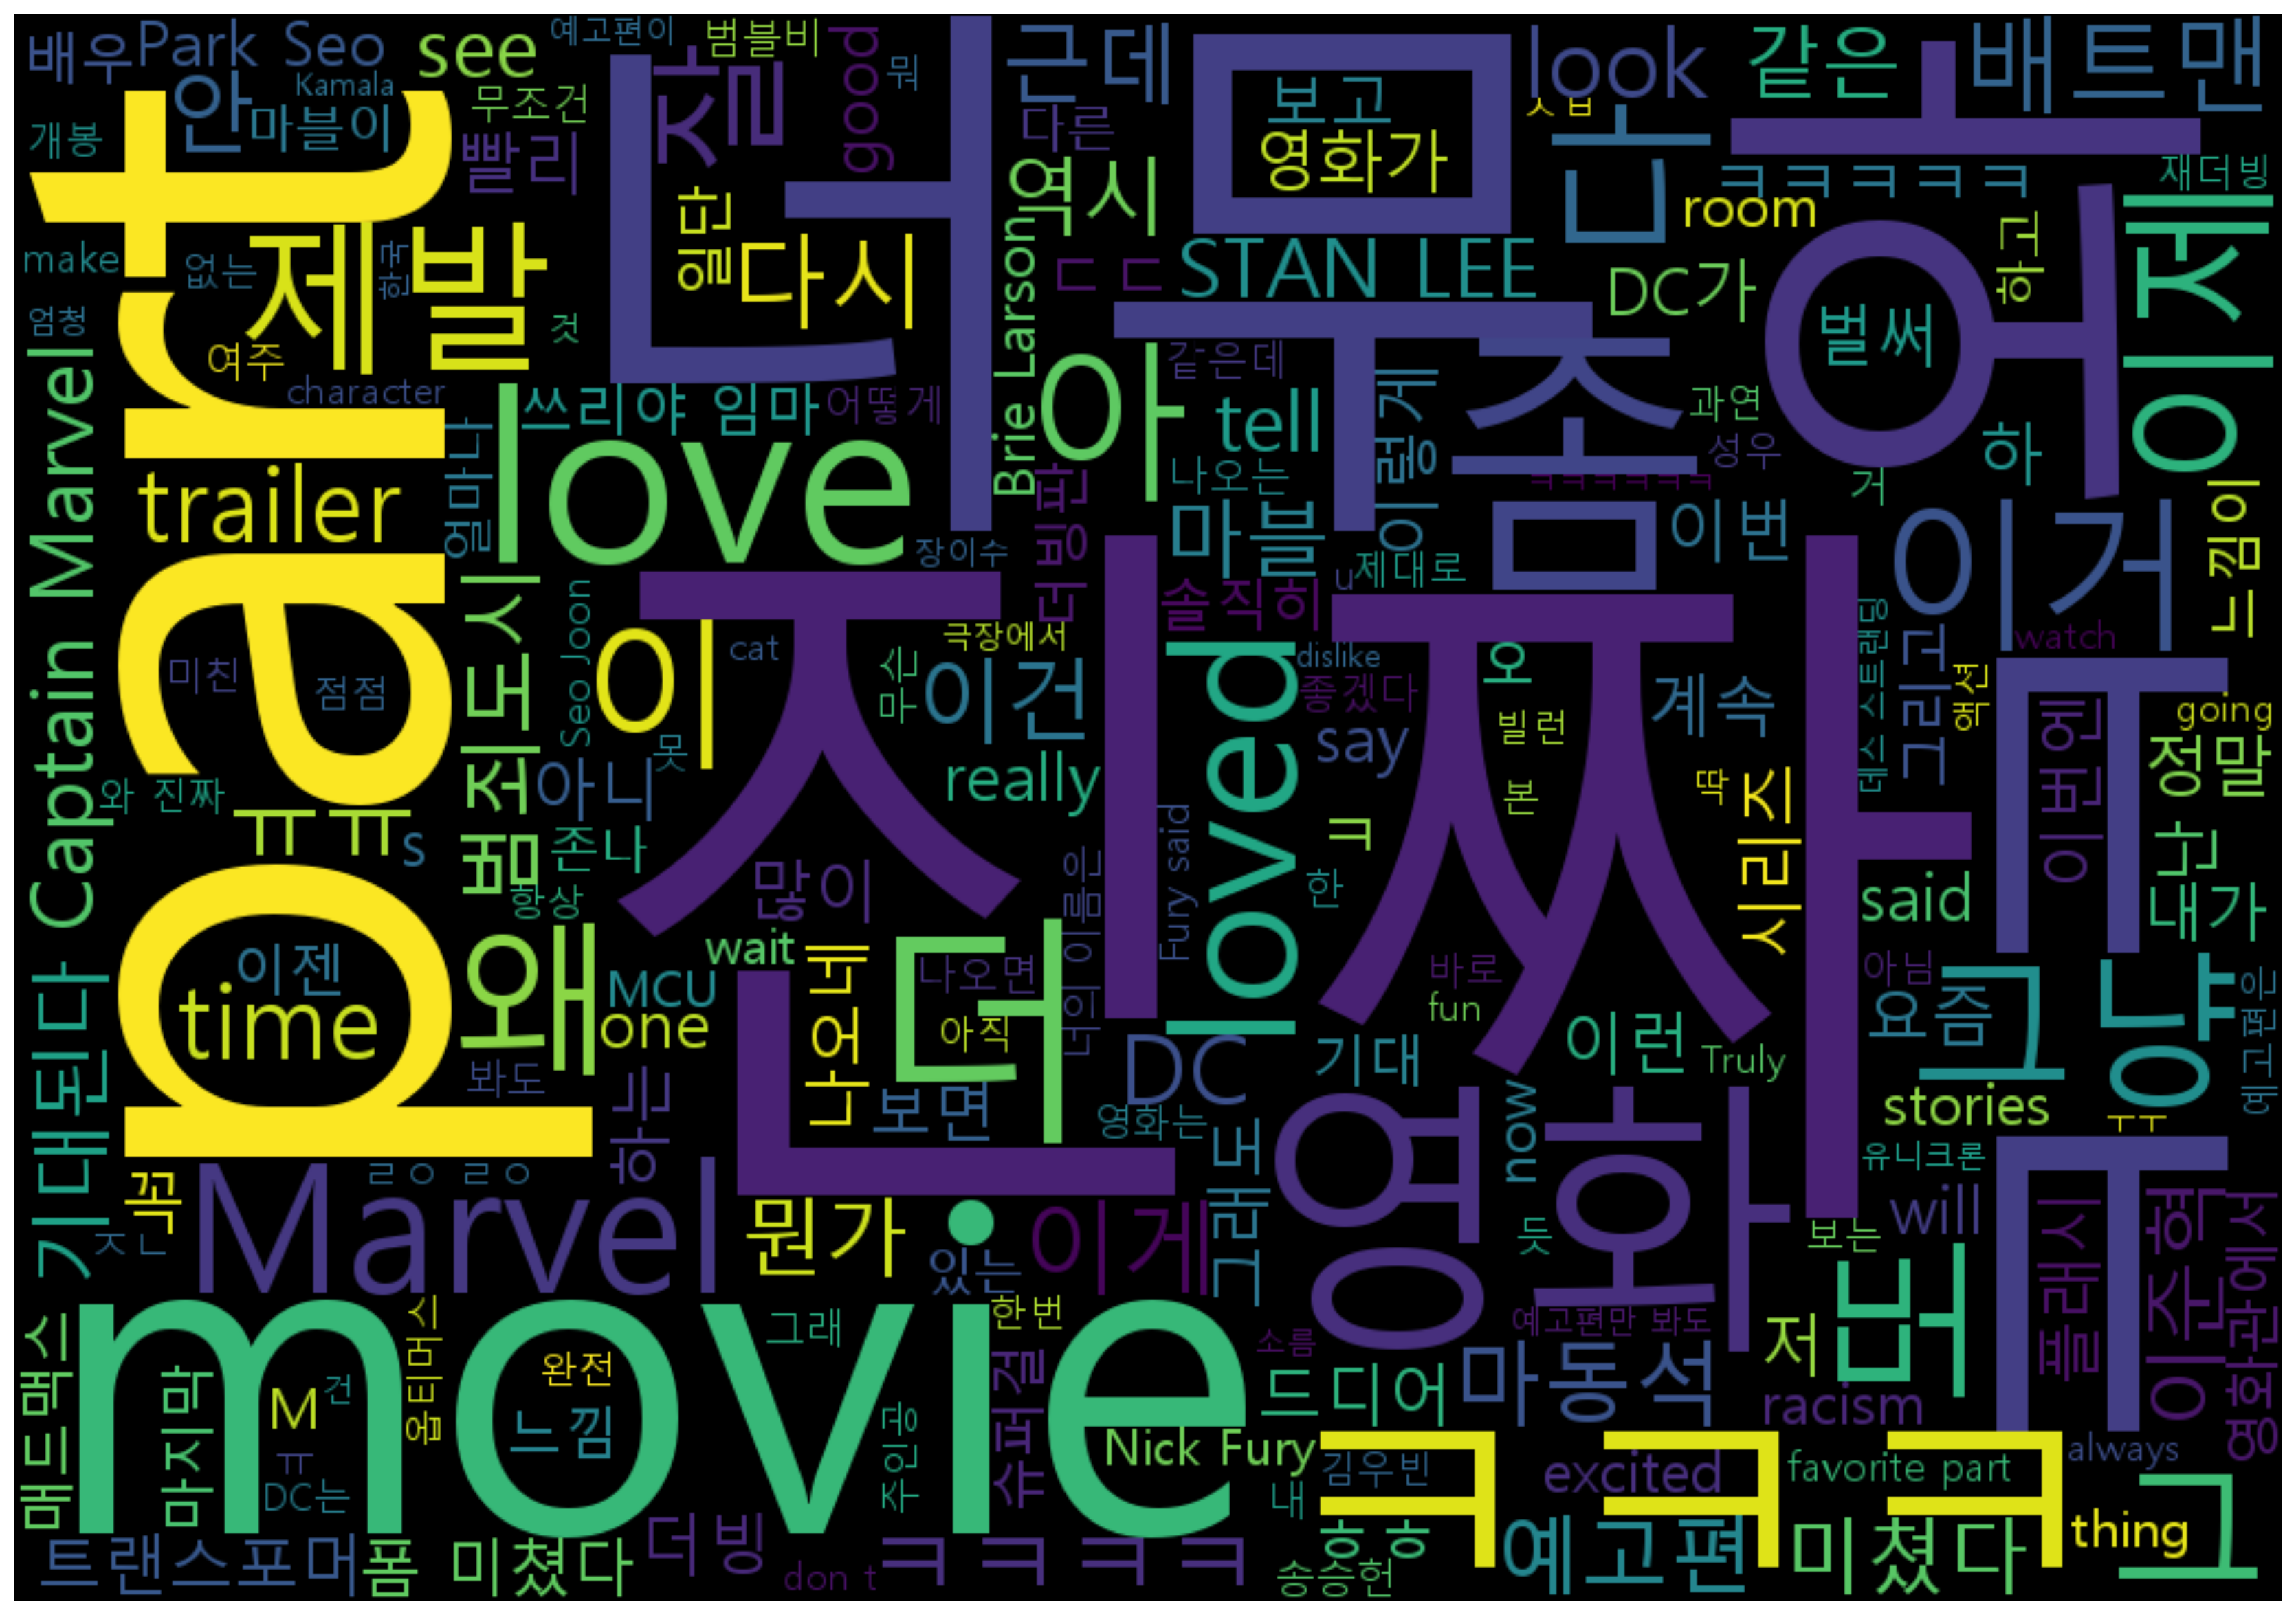

In [15]:
text =" ".join(li for li in youtube_pd['댓글 내용'].astype(str))

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 횟수를 기반으로 딕셔너리 생성
#from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
#from konlpy.tag import Hannanum


plt.subplots(figsize = (25, 15))
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 700, font_path="C:\Windows\Fonts\malgun.ttf").generate(text)
plt.axis('off')


plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()



In [19]:
plt.savefig('test_ten.png')

<Figure size 640x480 with 0 Axes>